**Unsupervised Learning:**

It involves learning patterns and structures in unlabeled data. The algorithm
explores the data and finds meaningful relationships or clusters without any predefined labels or
targets.


Popular unsupervised learning algorithms

**1) K-Means Clustering:**

K-Means Clustering is an unsupervised machine learning algorithm used for clustering and data
segmentation. It aims to partition a given dataset into K clusters, where each data point belongs
to the cluster with the nearest mean (centroid). The algorithm iteratively assigns data points to
the nearest centroid and updates the centroids until convergence.

**The key hyperparameters of the K-Means Clustering algorithm:**

**n_clusters:**
The number of clusters (K) to form. It determines the desired number of clusters in the
dataset. This parameter must be specified before running the algorithm.

**init:**
The method for initializing the initial centroids. It can be set to "k-means++" (smart
initialization that improves convergence) or "random" (randomly selects initial centroids). The
default is "k-means++".

**n_init:**
The number of times the algorithm will be run with different centroid seeds. The final result
will be the best output in terms of inertia. The default is 10.

**max_iter:**
The maximum number of iterations for the algorithm to converge. If convergence is not
reached within this limit, the algorithm stops. The default is 300.

**tol:**
The tolerance for convergence. If the difference in the centroids' positions between iterations
is less than this value, the algorithm is considered to have converged. The default is 1e-4.

**algorithm:**
The algorithm used to compute the K-Means Clustering. It can be set to "auto", "full", or
"elkan". The "auto" option automatically selects the best algorithm based on the dataset. The
default is "auto".

In [1]:
from sklearn.datasets import make_blobs
# Create a synthetic dataset with 100 samples and 2 features
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, random_state=42)

In [2]:
from sklearn.cluster import KMeans

In [3]:
# Create a K-Means Clustering object with desired number of clusters (K)
kmeans = KMeans(n_clusters=3)
# Fit the K-Means model on the data
kmeans.fit(X)
# Get the cluster labels for each data point
labels = kmeans.labels_
# Get the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Labels:", labels)
print("Cluster Centroids:", centroids)

Cluster Labels: [1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
Cluster Centroids: [[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


In [4]:
# Visualize the clusters using visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

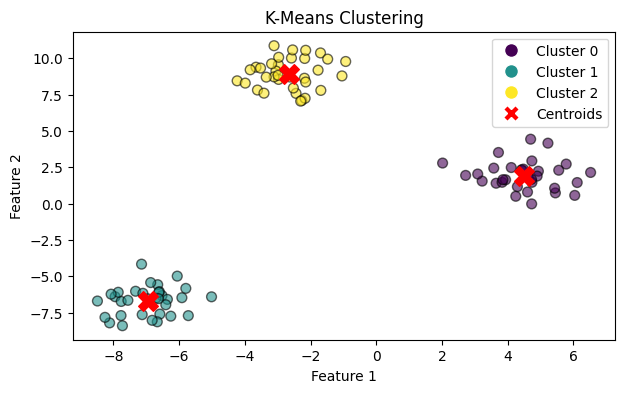

In [5]:
# Create a scatter plot for the data points
plt.figure(figsize=(7, 4))

# Plot the data points with color corresponding to their cluster label
scatter = plt.scatter(X[:, 0], X[:, 1],
                      c=labels,
                      cmap='viridis',
                      s=50,
                      alpha=0.6,
                      edgecolor='k')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red',
            s=200,
            marker='X',
            label='Centroids')
# Create a custom legend for clusters
# Generate a list of cluster labels
unique_labels = np.unique(labels)
# Create a legend entry for each cluster
handles = [plt.Line2D([0], [0],
                      marker='o',
                      color='w',
                      markerfacecolor=plt.cm.viridis(i / (len(unique_labels) - 1)),
                      markersize=10,
                      label=f'Cluster {i}') for i in unique_labels]
# Add custom legend handles to the plot
plt.legend(handles=handles + [plt.Line2D([0], [0],
                                         marker='X',
                                         color='w',
                                         markerfacecolor='red',
                                         markersize=11,
                                         label='Centroids')])
# Add titles and labels
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**2) Agglomerative Clustering (Hierarchical Clustering)**

Hierarchical Clustering is an unsupervised machine learning algorithm used for clustering and
data segmentation. It builds a hierarchy of clusters by iteratively merging or splitting clusters
based on a distance or similarity metric. There are two main types of hierarchical clustering:
Agglomerative and Divisive.

**Here are the key hyperparameters for hierarchical clustering:**

**n_clusters:**
The desired number of clusters to form. This parameter is optional and specifies the number
of clusters to be formed at the end of the clustering process. If not provided, the algorithm
will create clusters based on a distance threshold or another stopping criterion.

**affinity:**
The distance or similarity metric used to compute the proximity between data points. It can
be set to "euclidean", "manhattan", "cosine", or other valid distance measures. The default is
"euclidean".

**linkage:**
The linkage criterion used to determine how to merge or split clusters. It can be set to
"ward", "complete", "average", or "single". The default is "ward", which minimizes the variance
of the clusters being merged.

**distance_threshold:**
The threshold to use when forming flat clusters. This parameter is optional and allows you to
specify a distance value at which clusters are formed. Clusters that have a distance less than
or equal to this threshold are merged into a single cluster.

In [6]:
from sklearn.cluster import AgglomerativeClustering
# Create an Agglomerative Clustering object with desired number of clusters (n_clusters)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
# Fit the hierarchical clustering model on the data
hc.fit(X)
# Get the cluster labels for each data point
labels = hc.labels_
print("Cluster Labels:", labels)

Cluster Labels: [1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]


In [7]:
# # Visualize the clusters using visualization libraries.

import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

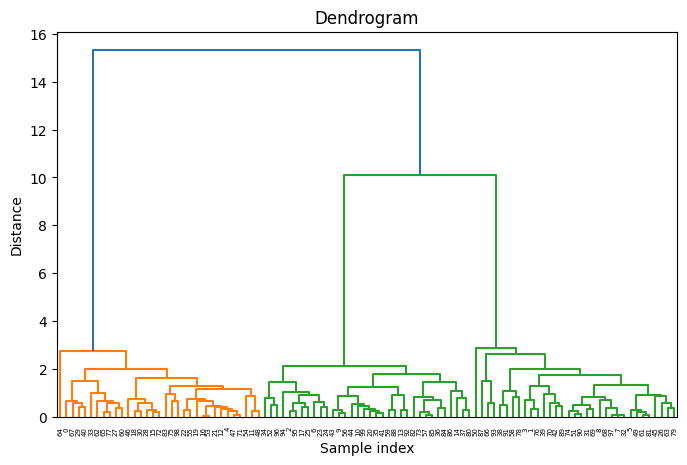

In [8]:
# Compute the linkage matrix
# Note: `linkage` function needs to be applied on the data to create the dendrogram
Z = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

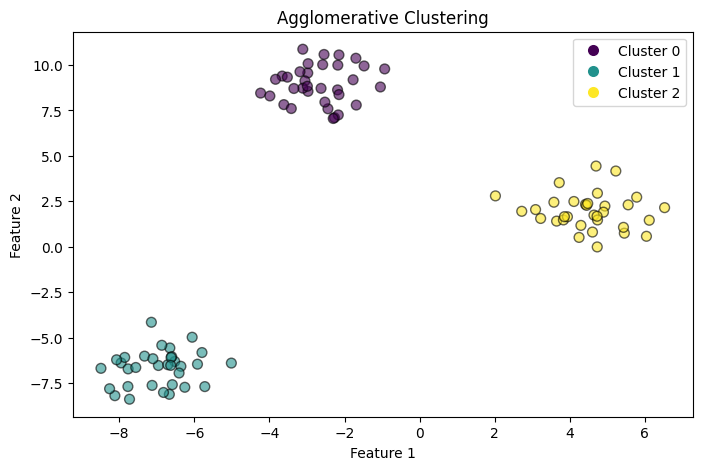

In [9]:
plt.figure(figsize=(8, 5))

# Plot the data points with color corresponding to their cluster label
scatter = plt.scatter(X[:, 0], X[:, 1],
                      c=labels,
                      cmap='viridis',
                      s=50,
                      alpha=0.6,
                      edgecolor='k')
# Create a custom legend for clusters
# Generate a list of cluster labels
unique_labels = np.unique(labels)
# Create a legend entry for each cluster
handles = [plt.Line2D([0], [0],
                      marker='o',
                      color='w',
                      markerfacecolor=plt.cm.viridis(i / (len(unique_labels) - 1)),
                      markersize=9,
                      label=f'Cluster {i}') for i in unique_labels]

# Add custom legend handles to the plot
plt.legend(handles=handles)

# Add titles and labels
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**3) DBSCAN (Density-Based Spatial Clustering of Applications with
Noise):**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised
machine learning algorithm used for clustering and data segmentation. It groups together data
points that are close to each other in dense regions, while labeling data points in sparser regions
as noise or outliers. DBSCAN does not require the number of clusters to be specified in advance
and can discover clusters of arbitrary shapes.

**The key hyperparameters for DBSCAN:**

**eps:**
The maximum distance between two data points to be considered neighbors. It defines the
radius of the neighborhood around each data point. Points within this distance are
considered part of the same cluster. The default value is 0.5.

**min_samples:**
The minimum number of data points required to form a dense region. Points that have at
least min_samples neighbors within the eps radius are considered core points and are used
to form clusters. The default value is 5.

**metric:**
The distance metric used to compute the distance between data points. It can be set to a
valid string identifier or a callable function that takes two arrays and returns a distance
value. The default is "euclidean".

**algorithm:**
The algorithm used to compute the DBSCAN clustering. It can be set to "auto", "ball_tree",
"kd_tree", or "brute". The "auto" option automatically selects the best algorithm based on
the dataset. The default is "auto".

**leaf_size:**
The leaf size passed to the ball_tree or kd_tree algorithms. It affects the speed and memory
usage of the algorithm. The default is 30.

**n_jobs:**
The number of parallel jobs to run for neighbor search. It can speed up the computation for
large datasets. Setting it to -1 uses all available processors. The default is 1.

In [10]:
from sklearn.cluster import DBSCAN
# Create a DBSCAN object with desired epsilon (eps) and minimum samples (min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
# Fit the DBSCAN model on the data
dbscan.fit(X)
# Get the cluster labels for each data point
labels = dbscan.labels_
print("Cluster Labels:", labels)

Cluster Labels: [-1 -1 -1 -1  0  1 -1  4 -1 -1  3  0  0 -1 -1  2  0 -1  2  0  3  0 -1 -1
 -1 -1  1 -1  2 -1  2  4  4 -1 -1  3 -1  3 -1 -1 -1  3 -1 -1  3 -1 -1  0
 -1  1 -1  5 -1  0 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  4  5 -1  0
  2 -1  5  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1
 -1  4 -1  3]


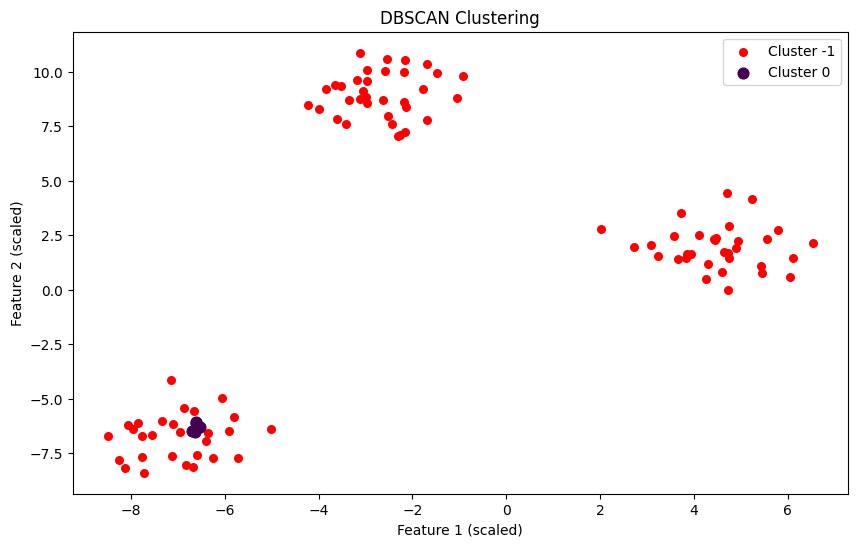

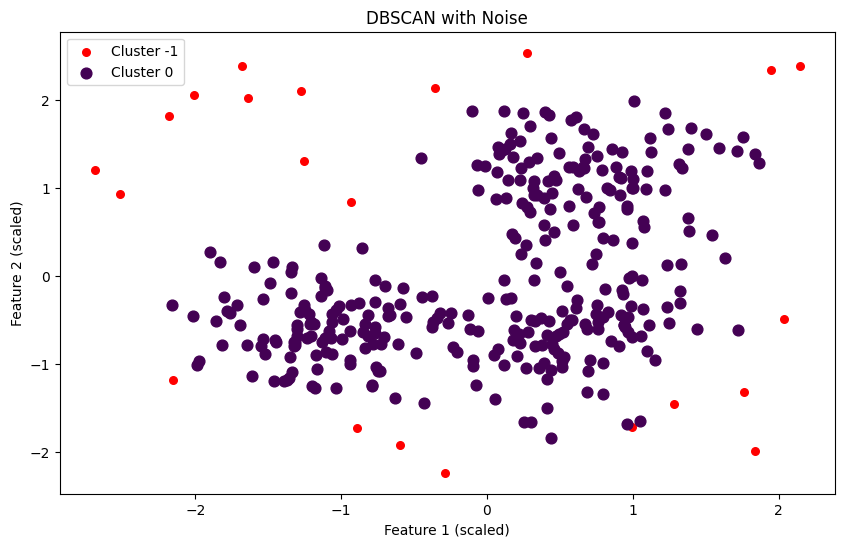

In [11]:
# Visualize the clusters using visualization libraries.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5) #adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X)

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot each cluster
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    if cluster == -1:  # Outliers are labeled as -1
        color = 'red'
        size = 30
    else:
        color = plt.cm.viridis(cluster / len(unique_clusters)) #use a color map
        size = 60
    plt.scatter(X[clusters == cluster, 0], X[clusters == cluster, 1],
                s=size, c=[color], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

#Example with an artificially generated dataset with noise.
np.random.seed(0)
n_points = 300
centers = [[1, 1], [-1, -1], [1, -1]]
X_noisy = np.concatenate([np.random.normal(center, 0.5, (100, 2)) for center in centers])
X_noisy = np.concatenate([X_noisy, np.random.uniform(-3, 3, (50, 2))]) #add noise
X_noisy_scaled = StandardScaler().fit_transform(X_noisy)

dbscan_noisy = DBSCAN(eps=0.4, min_samples=7)
clusters_noisy = dbscan_noisy.fit_predict(X_noisy_scaled)

plt.figure(figsize=(10, 6))

unique_clusters_noisy = np.unique(clusters_noisy)
for cluster in unique_clusters_noisy:
  if cluster == -1:
    color = 'red'
    size = 30
  else:
    color = plt.cm.viridis(cluster/len(unique_clusters_noisy))
    size = 60
  plt.scatter(X_noisy_scaled[clusters_noisy == cluster, 0], X_noisy_scaled[clusters_noisy == cluster, 1], s=size, c=[color], label = f"Cluster {cluster}")

plt.title("DBSCAN with Noise")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()